In [1]:
%load_ext sql
%sql sqlite://///home/mikew/extracover/male_t20.db

Tip: You may define configurations in /home/mikew/extracover/pyproject.toml or /home/mikew/.jupysql/config.

Did not find user configurations in /home/mikew/extracover/pyproject.toml.

Connecting to 'sqlite://///home/mikew/extracover/male_t20.db'

In [11]:
%config SqlMagic.displaylimit=20

## Run distribution by phase of innings

In [22]:
qry = """
WITH phased AS (
    SELECT
        *
    ,   CASE
        WHEN over BETWEEN 0 AND 5 THEN '0 powerplay'
        WHEN over BETWEEN 6 AND 17 THEN '1 mid-innings'
        ELSE '2 last two'
        END as phase
    FROM balls
)
SELECT phase, batter_runs, COUNT(*) AS count
FROM phased
WHERE innings < 2
AND extra_type = ''
AND batter_runs in (0,1,2,3,4,6)
GROUP BY phase, batter_runs
"""
result=%sql {{qry}}
df=result.DataFrame()
df.pivot(columns="phase", index="batter_runs", values="count")

Running query in 'sqlite://///home/mikew/extracover/male_t20.db'

phase,0 powerplay,1 mid-innings,2 last two
batter_runs,,,
0,255696,331451,37221
1,150345,460746,45550
2,26295,77402,15030
3,3209,3431,575
4,80103,89359,15193
6,19391,48887,11072


## Average runs by over

Running query in 'sqlite://///home/mikew/extracover/male_t20.db'

<Axes: xlabel='over'>

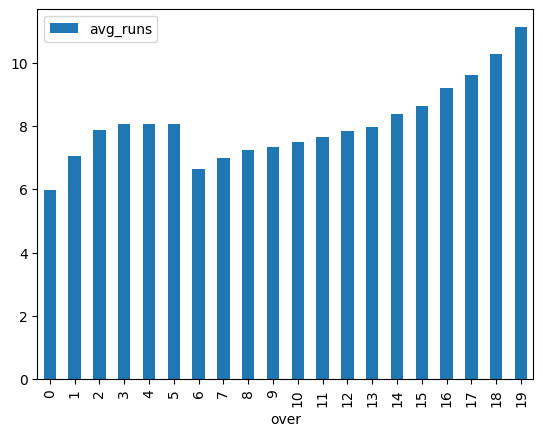

In [29]:
sql= """WITH
	over_runs AS (
SELECT
	over
,	CAST(SUM(batter_runs) + SUM(extra_runs) AS FLOAT) AS runs
FROM balls
WHERE innings = 0
GROUP BY match_id, over
HAVING MAX(ball) = 5
)
SELECT
	over
,	SUM(runs) / COUNT(*) AS avg_runs
FROM over_runs
GROUP BY over
ORDER BY over"""
result=%sql {{sql}}
df=result.DataFrame()
df.plot(x="over", y="avg_runs", kind="bar")